# Sin- und Cos-Anteile bei der DFT
Sinus- und Cosinusterme, mit denen in der DFT das Signal $y[k]$ multipliziert wird:
$$Y[n]=\sum^{N-1}_{k=0} y[k] (cos(2\pi \frac{n}{N}k)+j sin(2\pi \frac{n}{N}k))$$
Ab n=16 ist Aliasing in den Termen sichtbar, bei n=32 wiederholen sich die Abtastwerte.

IntSlider(value=1, description='N', max=35, min=-5)

Output()

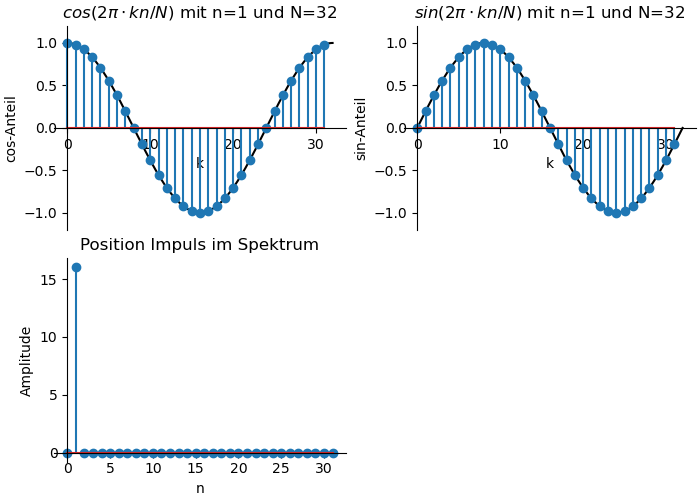

In [1]:
"""
Visualisierung der DFT-Sinus- und Kosinusanteile. 

(c) Benno Dömer | HS Pforzheim 2023 

"""
import platform
if platform.system() == "Emscripten": # running in JupyterLite
    %pip install -q ipywidgets
    %pip install -q ipympl

# 'widget' für interaktive Plots
%matplotlib widget 

# Import so, dass möglichst viele Funktionen "wie in Matlab" zur Verfügung stehen:
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, mod, angle, arange, linspace, zeros, ones) # numpy für's Rechnen, bei Bedarf anpassen
import matplotlib.pyplot as plt
from matplotlib.pyplot import (figure, plot, stem, legend, text,  
                               grid, xlabel, ylabel, subplot, title, clf, cla, xlim, ylim) # matpotlib für's  Plotten, bei Bedarf anpassen
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

fig1, ax1= plt.subplots(2,2,figsize=(7, 5), dpi=100, layout='constrained',num=' ')
ax = ax1[1][1];
ax.remove()
    
def plotsincos(n): # diese Funktion wird aufgerufen, wenn Slider bewegt werden (und initial einmal)
    plt.figure(fig1)
    N=32;
    k=arange(0,N,1)
    t = arange(0,N,0.01)
    showsin = True
    ax = ax1[0][0];
    ax.cla();
    if(showsin):
        ax.plot(t,cos(2*pi*t*n/N),'k')
        ax.stem(k,cos(2*pi*k*n/N));
    else:
        ax.stem(k,cos(2*pi*k*n/N));
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlabel('k')
    ax.set_ylabel('cos-Anteil')
    ax.set_title('$cos(2\pi\cdot kn/N)$' +f' mit n={n} und N={N}')
    myplotstyle(ax)
    
    ax = ax1[0][1];
    ax.cla();
    if(showsin):
        ax.plot(t,sin(2*pi*t*n/N),'k')
        ax.stem(k,sin(2*pi*k*n/N));
    else:
        ax.stem(k,sin(2*pi*k*n/N));
    ax.set_title('$sin(2\pi\cdot kn/N)$' +f' mit n={n} und N={N}')
    ax.set_xlabel('k')
    ax.set_ylabel('sin-Anteil')
    ax.set_ylim(-1.2, 1.2)
    myplotstyle(ax)
    
    
    ax = ax1[1][0];
    ax.cla();
    
    Y=zeros((N,1));
    if(mod(n,N)):
        Y[mod(n,N)]=N/2;
    else:
        Y[mod(n,N)]=N;
    
    ax.stem(k,Y); # fake DFT
    ax.set_xlabel('n')
    ax.set_ylabel('Amplitude')
    ax.set_title('Position Impuls im Spektrum')
    myplotstyle(ax)

    
# Definition von Bedienelementen
nslider  = widgets.IntSlider(min=-5, max=35, step=1, value=1, continuous_update=True, description='N')
#Verknüpfen mit Callback
out1 = widgets.interactive_output(plotsincos, { 'n': nslider}) 
#Anzeigen
display(nslider,out1)